In [1]:
import pandas as pd
import numpy as np
import mlflow.sklearn
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import DMatrix

In [2]:
pwd

'/mnt/c/Users/jisha/Documents/Customer_Churn_End_To_End'

In [3]:
data_df = pd.read_csv(r"Data/Customer-Churn-Records.csv")

In [4]:
data_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
data_df.drop(["RowNumber","CustomerId","Surname","Complain"],axis=1,inplace=True)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data_df_X = data_df[["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Satisfaction Score","Card Type","Point Earned"]]
Y = data_df["Exited"]

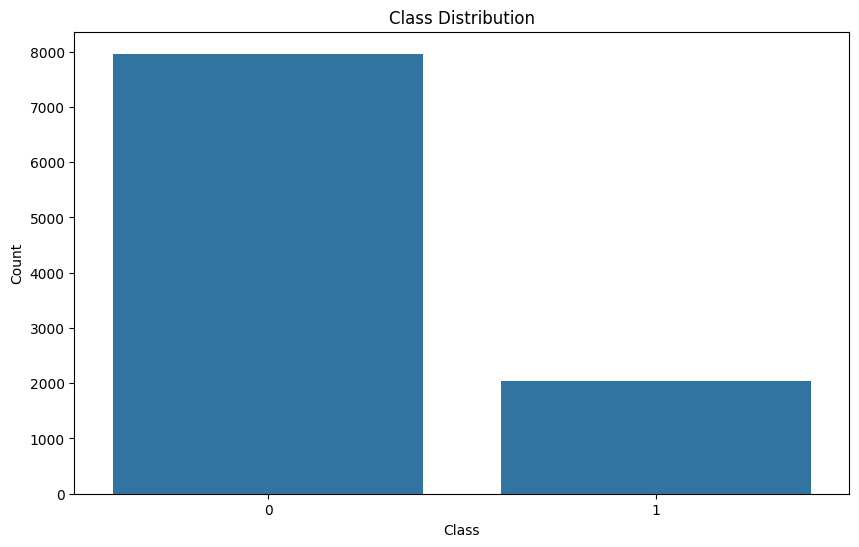

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_Y is a DataFrame with a single column containing class labels
class_counts = Y.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [16]:
### Converting Categorial Variables ###
cat_encoder = OneHotEncoder(drop="first",sparse=False)
encoded_columns = cat_encoder.fit_transform(data_df_X[["Geography","Gender","Card Type"]])
encoded_df = pd.DataFrame(encoded_columns,columns=cat_encoder.get_feature_names_out())
encoded_df

/home/jdesai06/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0
9996,0.0,0.0,1.0,0.0,1.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,1.0
9998,1.0,0.0,1.0,1.0,0.0,0.0


In [17]:
non_encoded_df = data_df_X[["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Satisfaction Score","Point Earned"]]
encoded_X = pd.concat([encoded_df,non_encoded_df],axis=1)
encoded_X

,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned
0,0.0,0.0,0.0,0.0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88,2,464
1,0.0,1.0,0.0,0.0,0.0,0.0,608,41,1,83807.86,1,0,1,112542.58,3,456
2,0.0,0.0,0.0,0.0,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57,3,377
3,0.0,0.0,0.0,1.0,0.0,0.0,699,39,1,0.00,2,0,0,93826.63,5,350
4,0.0,1.0,0.0,1.0,0.0,0.0,850,43,2,125510.82,1,1,1,79084.10,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,771,39,5,0.00,2,1,0,96270.64,1,300
9996,0.0,0.0,1.0,0.0,1.0,0.0,516,35,10,57369.61,1,1,1,101699.77,5,771
9997,0.0,0.0,0.0,0.0,0.0,1.0,709,36,7,0.00,1,0,1,42085.58,3,564
9998,1.0,0.0,1.0,1.0,0.0,0.0,772,42,3,75075.31,2,1,0,92888.52,2,339


In [18]:
encoded_X.to_csv("Data/Preprocessed_For_Tree_Models.csv",index=False)

In [37]:
## Train Test Split ##
X_train,X_temp,y_train,y_temp = train_test_split(encoded_X,Y,test_size=0.3, stratify= Y, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,stratify=y_temp,random_state=42)

In [39]:
## Scaling ##
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled.shape

(7000, 16)

In [44]:
X_test_scaled.shape

(1500, 16)

In [21]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("customer_churn_exp")

<Experiment: artifact_location='/mnt/c/Users/jisha/Documents/Customer_Churn_End_To_End/mlruns/1', creation_time=1704941464214, experiment_id='1', last_update_time=1704941464214, lifecycle_stage='active', name='customer_churn_exp', tags={}>

In [19]:
#Trying Logistic Regression
param_grid = {
    'C':[0.01,0.1,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear']
}

lr = LogisticRegression()
clf = GridSearchCV(lr,param_grid=param_grid,cv=5,scoring='f1')

with mlflow.start_run():
    clf.fit(X_train_scaled,y_train)
    mlflow.log_params(clf.best_params_)
    mlflow.log_metric("best_f1_score",clf.best_score_)
    mlflow.sklearn.log_model(clf.best_estimator_,"model")

/home/jdesai06/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [20]:
#Trying SVM for classification
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

param_grid_SVM = {
    "kernel":["rbf"],
    'C':np.logspace(-3,3,20),
    'gamma':np.logspace(-3,1,10),
}

svc = SVC()

# Perform the grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid_SVM, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best parameters found:", best_params)
print("Best f1 score found:", grid_search.best_score_)

Best parameters found: {'C': 112.88378916846884, 'gamma': 0.021544346900318832, 'kernel': 'rbf'}
Best f1 score found: 0.5393913061040175


In [23]:
with mlflow.start_run():
    svc = SVC(C = best_params['C'],gamma=best_params['gamma'],kernel='rbf')
    train_pred = svc.fit(X_train_scaled,y_train)
    val_pred = svc.predict(X_val_scaled)
    test_pred = svc.predict(X_test)
    val_f1_score = f1_score(y_val,val_pred)
    test_f1_score = f1_score(y_test,test_pred)
    mlflow.log_params(best_params)
    mlflow.log_metric("train_f1_score",grid_search.best_score_)
    mlflow.log_metric("val_f1_score",val_f1_score)
    mlflow.log_metric("test_f1_score",test_f1_score)
    mlflow.sklearn.log_model(svc,"model")

In [45]:
#Trying Random Forests
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100,200,300,500],
    'max_features': [None,'sqrt','log2']
}
best_params = None
max_oob_score = 0

for n_estimator in param_grid['n_estimators']:
    for feature in param_grid['max_features']:
        rf_model = RandomForestClassifier(n_estimators=n_estimator, max_features= feature, oob_score = True,random_state= 42,n_jobs= -1)
        rf_model.fit(X_train_scaled,y_train)
        oob_score = rf_model.oob_score_
        if oob_score > max_oob_score:
            max_oob_score = oob_score
            best_params = {'n_estimators': n_estimator,'max_features':feature}
            
final_rf_model = RandomForestClassifier(**best_params, random_state=42)
final_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [29]:
best_params['max_features']

'sqrt'

In [48]:
with mlflow.start_run():
    final_rf_model = RandomForestClassifier(**best_params, random_state=42)
    final_rf_model.fit(X_train_scaled, y_train)
    train_pred = final_rf_model.predict(X_train_scaled)
    val_pred = final_rf_model.predict(X_val_scaled)
    test_pred = final_rf_model.predict(X_test_scaled)
    train_f1_score = f1_score(y_train,train_pred,average='binary')
    val_f1_score = f1_score(y_val,val_pred,average='binary')
    test_f1_score = f1_score(y_test,test_pred,average='binary')
    mlflow.log_params(best_params)
    mlflow.log_metric("train_f1_score",train_f1_score)
    mlflow.log_metric("val_f1_score",val_f1_score)
    mlflow.log_metric("test_f1_score",test_f1_score)
    mlflow.sklearn.log_model(final_rf_model,"random forest")
# Evaluate the model using F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'macro' for multi-class, 'binary' for binary
print(f"Final Model F1 Score: {f1:.4f}")

Final Model F1 Score: 0.6089


In [23]:
encoded_X.shape

(10000, 16)

In [30]:
X_train.columns.tolist()

['Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
 'Card Type_GOLD',
 'Card Type_PLATINUM',
 'Card Type_SILVER',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Satisfaction Score',
 'Point Earned']

In [50]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix( test_pred , y_test)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1155  154]
 [  40  151]]


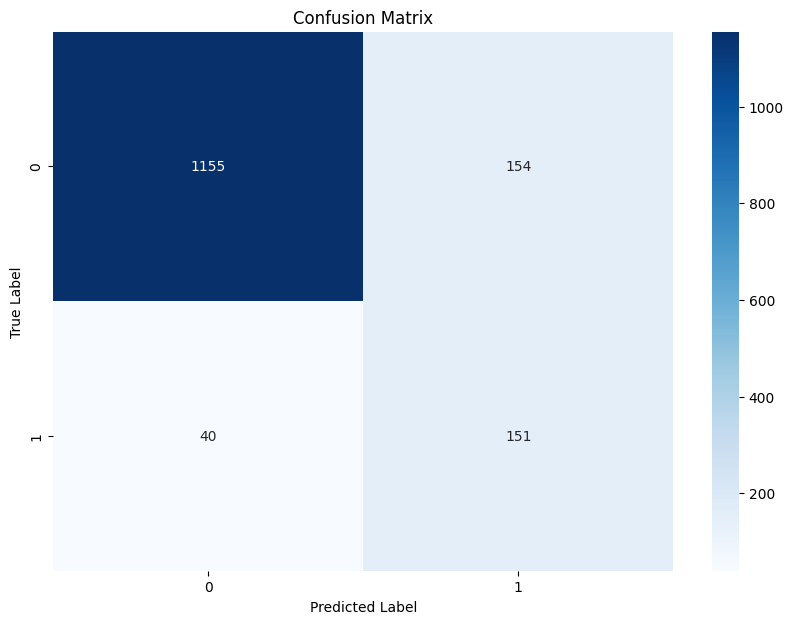

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
